In [1]:
from Bio import pairwise2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

overlap = [name for name in mcd.CSS4_COLORS]

In [2]:
#sfile = '../data/sequences/curvibacter_lipopolysaccharides.fasta'
sfile = '../data/curvibacter_eps_operon_17_organisms/rec_blast_curvi_processing/WP_087496557/target_fasta_sequences.faa'
#sfile = '../data/sequences/curvibacter_exopolysaccharides.fasta'

In [3]:
def read_multi_fasta_file(sfile):
    try:
        sequences = {}
        header_to_organism = {}
        with open(sfile,'r') as sfile:
            for line in sfile.readlines():
                if line.startswith(">"):
                    header = line.split('>')[1].split(" ")[0]
                    organism = line.split('[')[1].split("]")[0]
                    sequences[header] = ''
                    header_to_organism[header] = organism
                else:
                    line = line.rstrip()
                    sequences[header] += line
    except Exception as e:
        raise Exception("[-] ERROR during reading fasta file with Exception : {}".format(e))
    return sequences,header_to_organism

In [4]:
def calculate_pairwise_sequence_alignments(sequences):
    try:
        keylist = list(sequences.keys())
        columns = pd.Series(keylist)
        table = pd.DataFrame(columns=columns,index=columns, dtype='float64')
        normalized_table = pd.DataFrame(columns=columns,index=columns, dtype='float64')
        for i in range(len(keylist)):
            seq1 = keylist.pop()
            nscore = 100/len(sequences[seq1])
            for seq2 in keylist:
                res = pairwise2.align.globalxx(sequences[seq1],sequences[seq2])
                table[seq2][seq1] = res[0][2]
                table[seq1][seq2] = res[0][2]
                normalized_table[seq2][seq1] = round(res[0][2] * nscore,2)
                normalized_table[seq1][seq2] = round(res[0][2] * nscore,2)
            table[seq1][seq1] = len(sequences[seq1])
            normalized_table[seq1][seq1] = 100
    except Exception as e:
        raise Exception("[-] ERROR during pairwise sequence alignment with Exception : {}".format(e))
    return table,normalized_table

In [5]:
def transform_index_header_columns(header_to_organism,normalized_table):
    try:
        new_columns = []
        columns = normalized_table.columns
        for seqId in columns:
            new_columns.append(header_to_organism[seqId])#+ ' '+seqId
        normalized_table.columns = new_columns
        normalized_table.index = new_columns
    except Exception as e:
        raise Exception("[-] ERROR during table index/header renaming with Exception : {}".format(e))
    return normalized_table

In [6]:
def calculate_pairwise_alignment_table(sfile):
    sequences,header_to_organism = read_multi_fasta_file(sfile)
    table, normalized_table = calculate_pairwise_sequence_alignments(sequences)
    normalized_table = transform_index_header_columns(header_to_organism,normalized_table)
    return normalized_table

In [7]:
def produce_clustermap(table):    
    lut = dict(zip(set(table.columns), np.random.choice(overlap,size=len(set(table.columns)))))
    row_colors = table.columns.map(lut)
    sns.set(font_scale=2)
    return sns.clustermap(table,annot=True, figsize=(42,34), cmap="mako", 
                   row_colors=row_colors, cbar_pos=(1, .2, .03, .4))

In [8]:
def produce_heatmap(table):
    table.sort_index(level=0, ascending=True, inplace=True)
    corr= table.corr()
    # Getting the Upper Triangle of the co-relation matrix
    matrix = np.triu(corr)
    plt.figure(figsize=(42,34))
    return sns.heatmap(table,annot=True, cmap="mako",mask=matrix)

In [ ]:
#ntable = calculate_pairwise_alignment_table("../data/sequences/epsh_targets.faa")

In [ ]:
#ntable = calculate_pairwise_alignment_table(sfile)

In [ ]:
#lps_table = calculate_pairwise_alignment_table("../data/sequences/curvibacter_lipopolysaccharides.fasta")

In [9]:
epsF_table = calculate_pairwise_alignment_table("../data/lps_synthesis/heatmap/changed_header_epsF.faa")

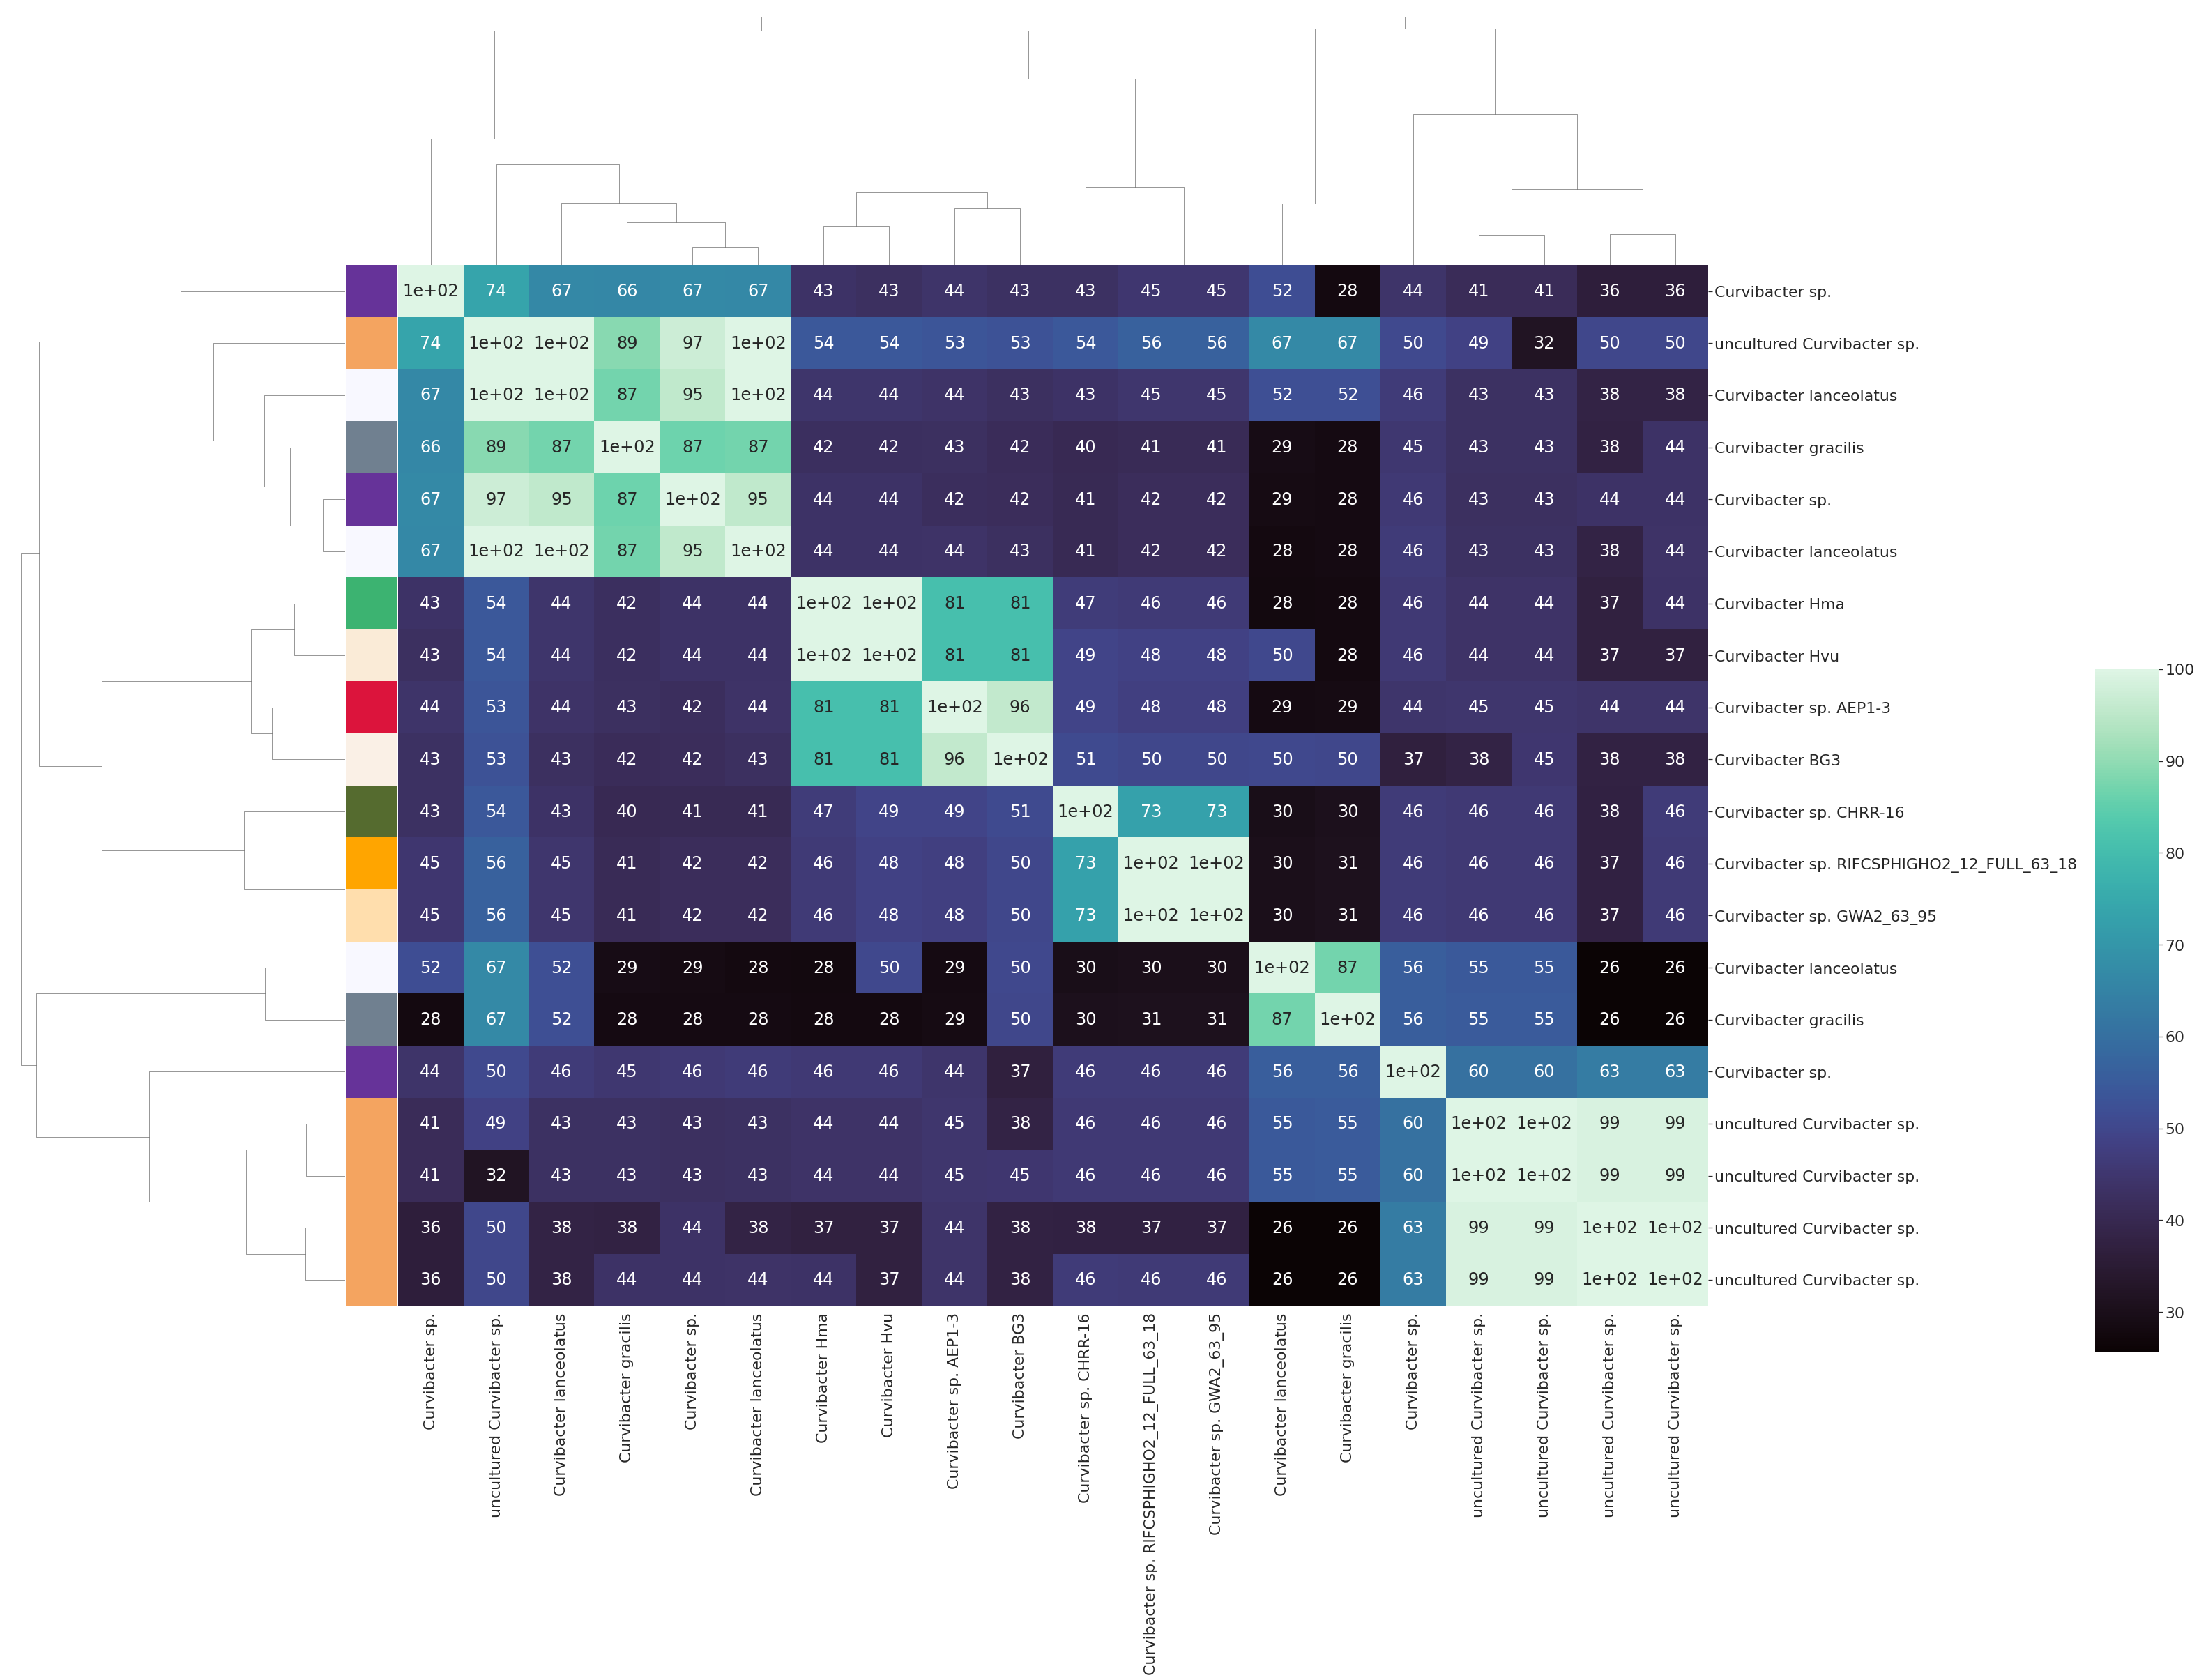

In [10]:
clusterEPSF = produce_clustermap(epsF_table)

In [11]:
clusterEPSF.savefig("../data/lps_synthesis/heatmap/clusterEPSF.png",dpi=400)

In [ ]:
eps_table = calculate_pairwise_alignment_table("../data/sequences/curvibacter_exopolysaccharides.fasta")

In [ ]:
Ifile = 'WP_087496556/target_fasta_sequences.faa'
Hfile = 'WP_087496557/target_fasta_sequences.faa'

In [ ]:
epsI_table = calculate_pairwise_alignment_table(Ifile)
epsH_table = calculate_pairwise_alignment_table(Hfile)
clusterI = produce_clustermap(epsI_table)
clusterH = produce_clustermap(epsH_table)

In [ ]:
eps_df = calculate_pairwise_alignment_table('WP_087496558/target_fasta_sequences.faa')

In [ ]:
produce_clustermap(eps_df)

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=numpy_data,
                   x=eps_table.columns,
                   y=eps_table.columns,
                   hoverongaps = False))
fig.update_layout(title="Exopolysaccharides of different Curvibacter sequences", 
                  yaxis_nticks=10,
                  xaxis_nticks=10,
                 #width=1200,
                 #height=1400,
                 xaxis={"tickangle":45})
fig.show()

In [ ]:
fig = px.imshow(eps_table)
fig.update_layout(title="Exopolysaccharides of different Curvibacter sequences", yaxis_nticks=10, xaxis_nticks=10)
fig.show()

In [ ]:
lut = dict(zip(set(lps_table.columns), np.random.choice(overlap,size=len(set(lps_table.columns)))))
row_colors = lps_table.columns.map(lut)
sns.clustermap(lps_table,annot=True, figsize=(42,34), cmap="mako", row_colors=row_colors)


In [ ]:
ntable.to_csv("../data/blast_results/all_vs_all_epsh.table",sep="\t")

In [ ]:
#plt.figure(figsize=(44,24))
sns.clustermap(ntable,annot=True, figsize=(42,34), cmap="mako")
#plt.savefig('../data/lps_heatmap.png',dpi=300)